In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls -lh /content/



total 8.0K
drwx------ 5 root root 4.0K Aug 30 22:44 drive
drwxr-xr-x 1 root root 4.0K Aug 28 13:43 sample_data


In [3]:
import time

start = time.time()

!cp /content/drive/MyDrive/Dataset.zip /content/

end = time.time()
print(f"Copy completed in {round(end - start, 2)} seconds")



Copy completed in 28.17 seconds


In [4]:
import zipfile

with zipfile.ZipFile("Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("Dataset")


In [5]:
base_path = '/content/Dataset/Dataset'

train_csv = f'{base_path}/all_train/train_merged.csv'
test_csv = f'{base_path}/all_test/test_category.csv'
train_dir = f'{base_path}/all_train/train'
test_dir = f'{base_path}/all_test/test'


In [6]:
#2. Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input  # ← VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#3. Parameter settings
IMAGE_RESIZE = 224
BATCH_SIZE_TRAINING = 64
BATCH_SIZE_VALIDATION = 64
NUM_EPOCHS = 20

#4. Load training CSV (ensure column names are consistent)
train_df = pd.read_csv(train_csv)
train_df['label'] = train_df['label'].astype(str)  # convert to string for binary mode compatibility


In [7]:
#5. Confusion matrix visualization function (optional during training)
def plot_confusion_matrix(y_true, y_pred, category_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {category_name}')
    plt.show()


In [8]:
#6. Image augmentation / preprocessing (using VGG16 preprocess_input)
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

save_dir = "/content/saved_models"
os.makedirs(save_dir, exist_ok=True)

best_val_acc = 0.0
best_model = None



====== Fold 1/5 ======
Found 24004 validated image filenames belonging to 2 classes.
Found 6002 validated image filenames belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 113s 278ms/step - accuracy: 0.5938 - loss: 2.5376 - val_accuracy: 0.7740 - val_loss: 0.7315
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.6875 - loss: 1.5402

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.6875 - loss: 1.5402 - val_accuracy: 0.7749 - val_loss: 0.7284
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 264ms/step - accuracy: 0.7183 - loss: 1.2689 - val_accuracy: 0.8251 - val_loss: 0.5215
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8125 - loss: 0.7507 - val_accuracy: 0.8251 - val_loss: 0.5208
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 98s 262ms/step - accuracy: 0.7686 - loss: 0.9108 - val_accuracy: 0.8478 - val_loss: 0.4274
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7969 - loss: 0.9237 - val_accuracy: 0.8480 - val_loss: 0.4276
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 264ms/step - accuracy: 0.7898 - loss: 0.7687 - val_accuracy: 0.8532 - val_loss: 0.3944
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8125 - loss: 0.8095 - val_accuracy: 0.8538 - val_loss: 0.3940
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 267ms/step - accuracy: 0.8081 - loss: 0.6391 - val_ac

 Fold 1 Validation Accuracy: 0.8837
Saved best VGG16 model from Fold 1 with Val Acc: 0.8837


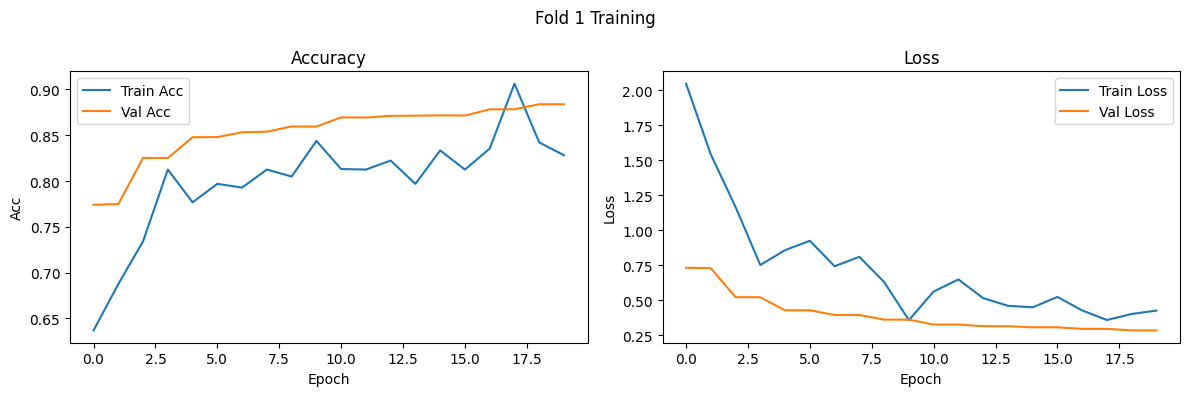


====== Fold 2/5 ======
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 270ms/step - accuracy: 0.5456 - loss: 3.1523 - val_accuracy: 0.7868 - val_loss: 0.6914
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.6719 - loss: 1.4040

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.6719 - loss: 1.4040 - val_accuracy: 0.7865 - val_loss: 0.6895
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 268ms/step - accuracy: 0.7166 - loss: 1.3438 - val_accuracy: 0.8325 - val_loss: 0.5162
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.8125 - loss: 0.9084 - val_accuracy: 0.8322 - val_loss: 0.5170
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 266ms/step - accuracy: 0.7658 - loss: 0.9674 - val_accuracy: 0.8538 - val_loss: 0.4091
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.7344 - loss: 0.8333 - val_accuracy: 0.8532 - val_loss: 0.4083
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 108s 289ms/step - accuracy: 0.7949 - loss: 0.7672 - val_accuracy: 0.8636 - val_loss: 0.3587
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.7812 - loss: 0.6991 - val_accuracy: 0.8634 - val_loss: 0.3583
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 294ms/step - accuracy: 0.7996 - loss: 0.6675 - val

 Fold 2 Validation Accuracy: 0.8883
Saved best VGG16 model from Fold 2 with Val Acc: 0.8883


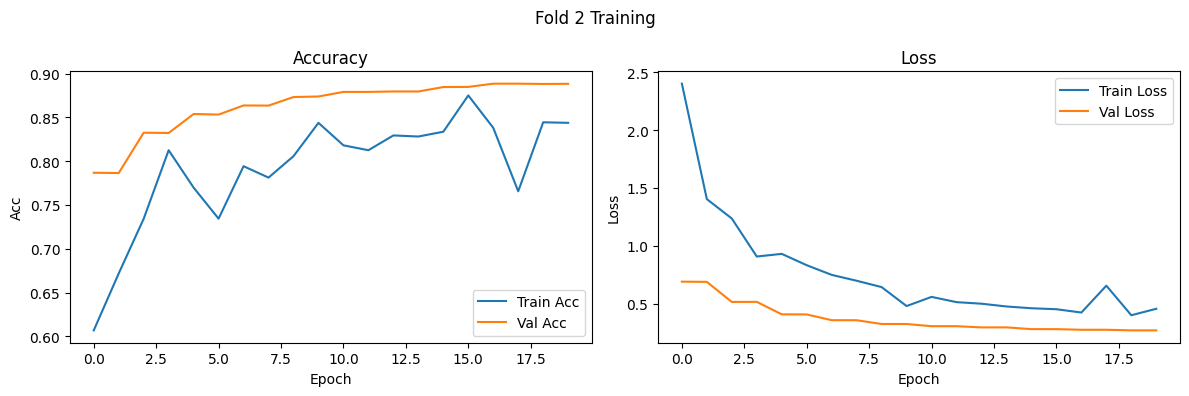


====== Fold 3/5 ======
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 117s 303ms/step - accuracy: 0.5965 - loss: 2.6651 - val_accuracy: 0.8096 - val_loss: 0.6554
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7031 - loss: 1.7048

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.7031 - loss: 1.7048 - val_accuracy: 0.8096 - val_loss: 0.6570
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 292ms/step - accuracy: 0.7342 - loss: 1.3278 - val_accuracy: 0.8518 - val_loss: 0.4712
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.6875 - loss: 0.8844 - val_accuracy: 0.8516 - val_loss: 0.4695
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 109s 289ms/step - accuracy: 0.7688 - loss: 1.0265 - val_accuracy: 0.8659 - val_loss: 0.4057
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.7344 - loss: 1.0486 - val_accuracy: 0.8663 - val_loss: 0.4050
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 111s 297ms/step - accuracy: 0.7947 - loss: 0.7990 - val_accuracy: 0.8805 - val_loss: 0.3409
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.7656 - loss: 0.9522 - val_accuracy: 0.8809 - val_loss: 0.3404
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 109s 291ms/step - accuracy: 0.8005 - loss: 0.7143 - val

 Fold 3 Validation Accuracy: 0.9010
Saved best VGG16 model from Fold 3 with Val Acc: 0.9010


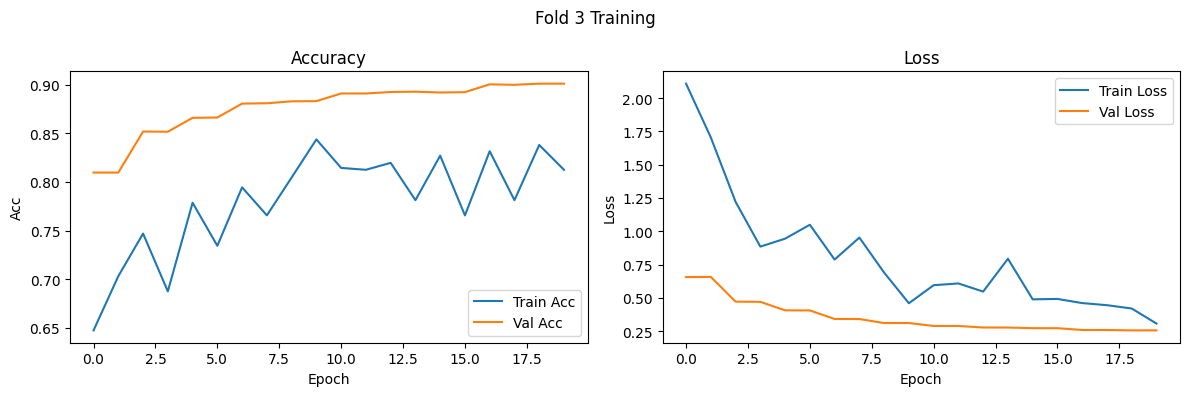


====== Fold 4/5 ======
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 115s 298ms/step - accuracy: 0.5576 - loss: 3.1601 - val_accuracy: 0.7927 - val_loss: 0.7083
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6875 - loss: 1.2030

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.6875 - loss: 1.2030 - val_accuracy: 0.7933 - val_loss: 0.7075
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 109s 291ms/step - accuracy: 0.7087 - loss: 1.4791 - val_accuracy: 0.8461 - val_loss: 0.4768
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.7500 - loss: 0.9009 - val_accuracy: 0.8459 - val_loss: 0.4765
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 112s 297ms/step - accuracy: 0.7618 - loss: 1.0279 - val_accuracy: 0.8616 - val_loss: 0.3933
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.8281 - loss: 0.8890 - val_accuracy: 0.8617 - val_loss: 0.3935
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 111s 297ms/step - accuracy: 0.7772 - loss: 0.8599 - val_accuracy: 0.8735 - val_loss: 0.3380
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.8594 - loss: 0.8684 - val_accuracy: 0.8735 - val_loss: 0.3379
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 294ms/step - accuracy: 0.7889 - loss: 0.7559 - val

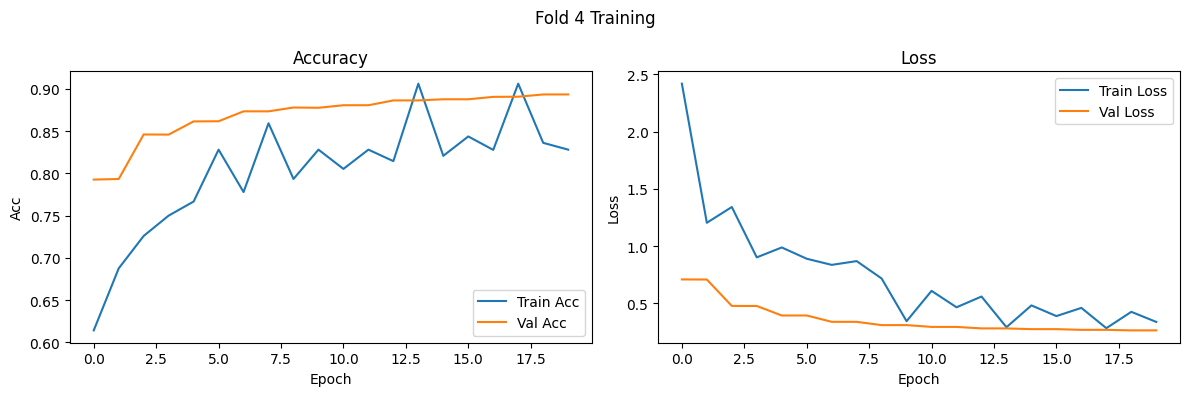


====== Fold 5/5 ======
Found 24005 validated image filenames belonging to 2 classes.
Found 6001 validated image filenames belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 119s 308ms/step - accuracy: 0.5977 - loss: 2.5508 - val_accuracy: 0.8127 - val_loss: 0.6085
Epoch 2/20
  1/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.7344 - loss: 1.2292

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.7344 - loss: 1.2292 - val_accuracy: 0.8132 - val_loss: 0.6073
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 111s 297ms/step - accuracy: 0.7301 - loss: 1.2829 - val_accuracy: 0.8528 - val_loss: 0.4459
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.8125 - loss: 0.5240 - val_accuracy: 0.8530 - val_loss: 0.4462
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 109s 291ms/step - accuracy: 0.7619 - loss: 0.9721 - val_accuracy: 0.8681 - val_loss: 0.3646
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.7500 - loss: 0.8357 - val_accuracy: 0.8681 - val_loss: 0.3644
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 294ms/step - accuracy: 0.7889 - loss: 0.7631 - val_accuracy: 0.8757 - val_loss: 0.3293
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.8438 - loss: 0.7514 - val_accuracy: 0.8760 - val_loss: 0.3287
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 108s 288ms/step - accuracy: 0.8001 - loss: 0.6500 - val

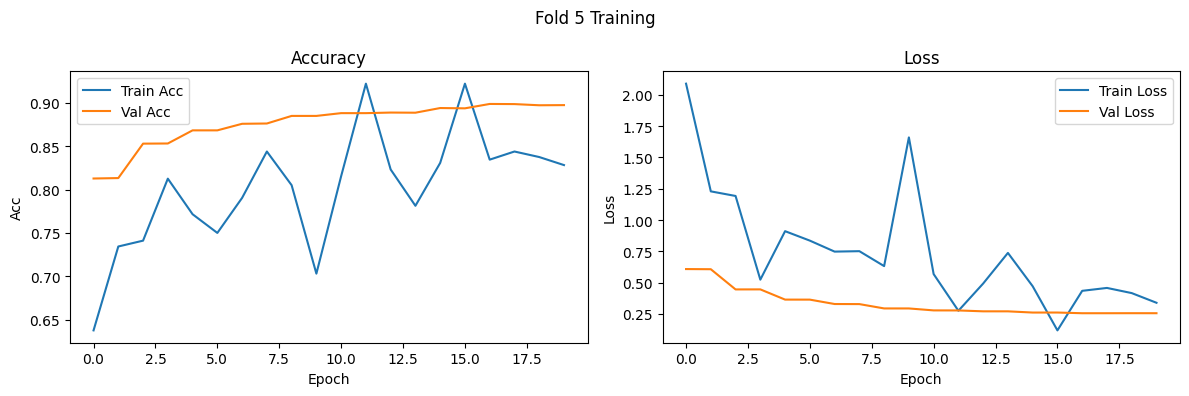

K-fold validation accuracies: ['0.8837', '0.8883', '0.9010', '0.8935', '0.8972']
Best Val Acc across folds: 0.9010


In [9]:
#7. K-Fold initialization
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(train_df['filename_only'], train_df['label'])):
    print(f"\n====== Fold {fold + 1}/{k} ======")

    train_fold_df = train_df.iloc[train_idx].reset_index(drop=True)
    val_fold_df = train_df.iloc[val_idx].reset_index(drop=True)

    train_generator = data_generator.flow_from_dataframe(
        dataframe=train_fold_df,
        directory=train_dir,
        x_col='filename_only',
        y_col='label',
        target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='binary',
        shuffle=True
    )

    validation_generator = data_generator.flow_from_dataframe(
        dataframe=val_fold_df,
        directory=train_dir,
        x_col='filename_only',
        y_col='label',
        target_size=(IMAGE_RESIZE, IMAGE_RESIZE),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='binary',
        shuffle=False
    )

    steps_per_epoch = max(1, len(train_fold_df) // BATCH_SIZE_TRAINING)
    validation_steps = max(1, len(val_fold_df) // BATCH_SIZE_VALIDATION)

    #8. Model construction: VGG16 feature extractor + custom classifier
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(IMAGE_RESIZE, IMAGE_RESIZE, 3))
    base_model.trainable = False  # freeze feature extraction layers

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=5e-5),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    #8.1 Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    #8.2 Training
    fit_history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=[early_stop],
        verbose=1
    )

    #9. Record validation performance
    val_acc = fit_history.history['val_accuracy'][-1]
    fold_accuracies.append(val_acc)
    print(f" Fold {fold + 1} Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_model.save(os.path.join(save_dir, "best_vgg16_model.h5"))
        print(f"Saved best VGG16 model from Fold {fold + 1} with Val Acc: {val_acc:.4f}")

    #10. Plot training curves
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"Fold {fold + 1} Training")

    plt.subplot(1, 2, 1)
    plt.plot(fit_history.history['accuracy'], label='Train Acc')
    plt.plot(fit_history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Acc'); plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(fit_history.history['loss'], label='Train Loss')
    plt.plot(fit_history.history['val_loss'], label='Val Loss')
    plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

    plt.tight_layout()
    plt.show()

print("K-fold validation accuracies:", [f"{a:.4f}" for a in fold_accuracies])
print(f"Best Val Acc across folds: {best_val_acc:.4f}")
